# History: Learning Curves

In [1]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
tcolors = {
    k.replace('tab:', ''): v
    for k, v in mcolors.TABLEAU_COLORS.items()
}

tcolors.keys()

dict_keys(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])

In [3]:
COLORS = {
    'p3dresnet': [tcolors['green'], tcolors['purple']],
    'resnet50': [tcolors['blue'], tcolors['orange']],
}

def plot_vs_ref(solid, dash, dot=None):
    
    # colors
    train_color = {}
    valid_color = {}
    for line, case in [('solid', solid),
                       ('dash', dash),
                       ('dot', dot)]:
        if line == 'dot' and dot is None:
            continue
        if 'p3dresnet' in case:
            train_color[line] = COLORS['p3dresnet'][0]
            valid_color[line] = COLORS['p3dresnet'][1]
        else:
            train_color[line] = COLORS['resnet50'][0]
            valid_color[line] = COLORS['resnet50'][1]

    # plot
    plt.figure(figsize=[10, 3])
    
    # train
    plt.plot(logs[solid]['epoch'], logs[solid]['dice_coef'],
         color=train_color['solid'], linestyle='solid', label=solid)
    plt.plot(logs[dash]['epoch'], logs[dash]['dice_coef'],
         color=train_color['dash'], linestyle='dashed', label=dash)
    if dot is not None:
        plt.plot(logs[dot]['epoch'], logs[dot]['dice_coef'],
             color=train_color['dot'], linestyle='dotted', label=dot)
    # valid
    plt.plot(logs[solid]['epoch'], logs[solid]['val_dice_coef'],
         color=valid_color['solid'], linestyle='solid')
    plt.plot(logs[dash]['epoch'], logs[dash]['val_dice_coef'],
         color=valid_color['dash'], linestyle='dashed')
    if dot is not None:
        plt.plot(logs[dot]['epoch'], logs[dot]['val_dice_coef'],
             color=valid_color['dot'], linestyle='dotted')
    # settings
    #plt.title(f'{solid} vs {dash}')
    plt.legend(loc='upper left', facecolor='white', framealpha=1.0)
    plt.xlim(0., None)
    plt.ylim(0., 0.7)
    plt.grid(axis='y', color='lightgrey')

In [4]:
log_dir = Path('.')

In [5]:
list(log_dir.iterdir())

[WindowsPath('.ipynb_checkpoints'),
 WindowsPath('History.ipynb'),
 WindowsPath('identify-contrails_2023-07-24_21-10-06_log.csv'),
 WindowsPath('identify-contrails_2023-07-24_22-38-16_log.csv'),
 WindowsPath('identify-contrails_2023-07-25_00-58-50_log.csv'),
 WindowsPath('identify-contrails_2023-07-28_19-34-15_log.csv'),
 WindowsPath('identify-contrails_2023-07-28_21-26-12_log.csv'),
 WindowsPath('identify-contrails_2023-07-28_21-28-24_log.csv'),
 WindowsPath('identify-contrails_2023-07-28_22-38-12_log.csv'),
 WindowsPath('identify-contrails_2023-07-29_16-03-20_log.csv'),
 WindowsPath('identify-contrails_2023-07-29_21-28-43_log.csv'),
 WindowsPath('identify-contrails_2023-07-30_10-32-45_log.csv'),
 WindowsPath('identify-contrails_2023-07-30_21-40-59_log.csv'),
 WindowsPath('identify-contrails_2023-07-31_08-06-27_log.csv'),
 WindowsPath('identify-contrails_2023-07-31_14-40-32_log.csv'),
 WindowsPath('identify-contrails_2023-07-31_17-55-47_log.csv'),
 WindowsPath('identify-contrails_2023

## List of runs

In [6]:
logs = {}

# UNet BasicEncoder
logs['unet_no-augm'] = pd.read_csv(next(log_dir.glob('*08-03_22-57-47*')))  # v39
logs['unet_light-augm'] = pd.read_csv(next(log_dir.glob('*08-03_22-59-02*')))  # v40
logs['unet_full-augm'] = pd.read_csv(next(log_dir.glob('*08-04_08-34-43*')))  # v41
logs['unet_light-augm_v44'] = pd.read_csv(next(log_dir.glob('*08-05_22-33-30*csv')))  # v44

# UNet P3DResNet
logs['unet_light-augm_p3dresnet'] = pd.read_csv(next(log_dir.glob('*08-04_17-12-56*')))  # v42

# DeepLabV3+ ResNet50
logs['deeplab_resnet50_ref'] = pd.read_csv(next(log_dir.glob('*07-24_22-38-16*')))
logs['deeplab_resnet50_lr002'] = pd.read_csv(next(log_dir.glob('*07-25_00-58-50*')))
logs['deeplab_resnet50_dropout'] = pd.read_csv(next(log_dir.glob('*07-30_10-32-45*')))
logs['deeplab_resnet50_lr001_50ep'] = pd.read_csv(next(log_dir.glob('*07-31_08-06-27*')))
logs['deeplab_resnet50_lr002_25ep'] = pd.read_csv(next(log_dir.glob('*07-31_14-40-32*')))
logs['deeplab_resnet50_lr002_25ep_woaugm'] = pd.read_csv(next(log_dir.glob('*07-31_17-55-47*')))
logs['deeplab_resnet50_lr002_continued'] = pd.read_csv(next(log_dir.glob('*08-01_22-54-39*')))
logs['deeplab_resnet50_conti_no-augm'] = pd.read_csv(next(log_dir.glob('*08-02_18-58-12*')))
logs['deeplab_resnet50_conti_augm'] = pd.read_csv(next(log_dir.glob('*08-03_23-08-18*')))
logs['deeplab_resnet50_no-augm_v47'] = pd.read_csv(next(log_dir.glob('*08-06_12-24-57*csv')))
logs['deeplab_resnet50_light-augm_v48'] = pd.read_csv(next(log_dir.glob('*08-06_12-29-17*csv')))

# DeepLabV3+ P3DResNet
logs['deeplab_p3dresnet_ref'] = pd.read_csv(next(log_dir.glob('*07-29_16-03-20*')))
logs['deeplab_p3dresnet_lr002'] = pd.read_csv(next(log_dir.glob('*07-28_21-26-12*')))  # v32
logs['deeplab_p3dresnet_gradacc'] = pd.read_csv(next(log_dir.glob('*07-28_21-28-24*')))  # v33
logs['deeplab_p3dresnet_gradacc-lr002'] = pd.read_csv(next(log_dir.glob('*07-28_22-38-12*')))
logs['deeplab_p3dresnet_dropout'] = pd.read_csv(next(log_dir.glob('*07-29_21-28-43*')))
logs['deeplab_p3dresnet_lr001_50ep'] = pd.read_csv(next(log_dir.glob('*07-30_21-40-59*')))
logs['deeplab_p3dresnet_lr002_50ep_woaugm'] = pd.read_csv(next(log_dir.glob('*07-31_23-01-22*')))
logs['deeplab_p3dresnet_lr002_continued'] = pd.read_csv(next(log_dir.glob('*08-02_00-37-23*')))
logs['deeplab_p3dresnet_conti_no-augm'] = pd.read_csv(next(log_dir.glob('*08-02_19-50-23*')))
logs['deeplab_p3dresnet_conti_augm'] = pd.read_csv(next(log_dir.glob('*08-04_01-36-29*')))
logs['deeplab_p3dresnet_light-augm_conv3d'] = pd.read_csv(next(log_dir.glob('*08-04_17-20-21*')))  # v43
logs['deeplab_p3dresnet_light-augm_conv3d_frames-before_upsample'] = pd.read_csv(next(log_dir.glob('*08-05_00-12-06*')))
logs['deeplab_p3dresnet_light-augm_conv3d_frames-before'] = pd.read_csv(next(log_dir.glob('*08-05_09-23-45*')))
logs['deeplab_p3dresnet_maxpool_frames-before_half-train'] = pd.read_csv(next(log_dir.glob('*08-05_15-32-49*csv')))
logs['deeplab_p3dresnet_maxpool_frames-before_full-train'] = pd.read_csv(next(log_dir.glob('*08-05_17-30-13*csv')))
logs['deeplab_p3dresnet_light-augm_v45'] = pd.read_csv(next(log_dir.glob('*08-05_22-42-10*csv')))
logs['deeplab_p3dresnet_no-augm_v49'] = pd.read_csv(next(log_dir.glob('*08-06_20-50-48*csv')))

# shift epochs of continued runs
logs['deeplab_resnet50_lr002_continued']['epoch'] += 13
logs['deeplab_p3dresnet_lr002_continued']['epoch'] += 21
logs['deeplab_resnet50_conti_no-augm']['epoch'] += 32
logs['deeplab_p3dresnet_conti_no-augm']['epoch'] += 39
logs['deeplab_resnet50_conti_augm']['epoch'] += 32 + 10
logs['deeplab_p3dresnet_conti_augm']['epoch'] += 39 + 10

In [7]:
logs['deeplab_p3dresnet_ref'].columns

Index(['epoch', 'dice_coef', 'loss', 'lr', 'val_dice_coef', 'val_loss'], dtype='object')

## U-Net

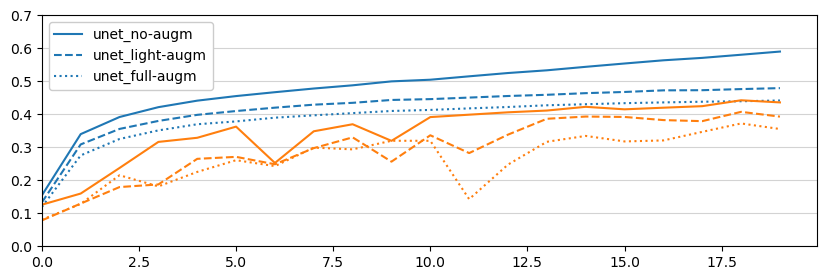

In [8]:
plot_vs_ref('unet_no-augm', 'unet_light-augm', 'unet_full-augm')

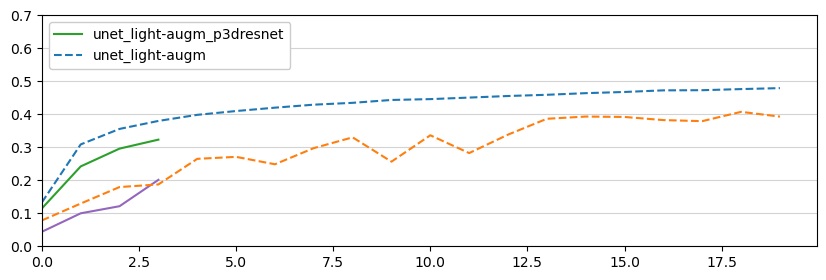

In [9]:
plot_vs_ref('unet_light-augm_p3dresnet', 'unet_light-augm')

## DeepLabV3+/ResNet50

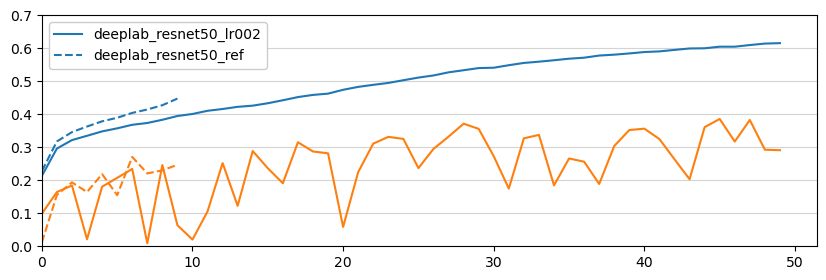

In [10]:
plot_vs_ref('deeplab_resnet50_lr002', 'deeplab_resnet50_ref')

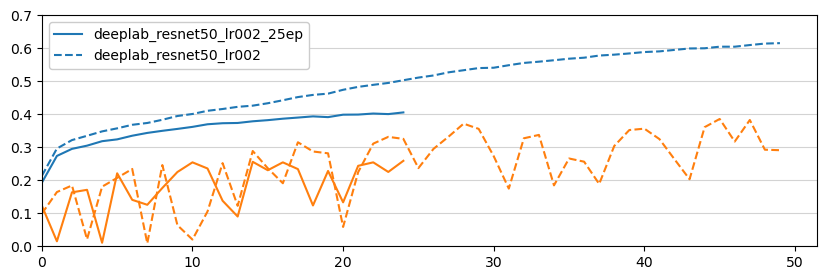

In [11]:
plot_vs_ref('deeplab_resnet50_lr002_25ep', 'deeplab_resnet50_lr002')

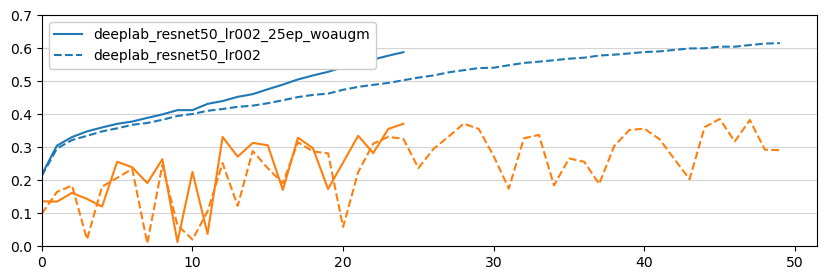

In [12]:
plot_vs_ref('deeplab_resnet50_lr002_25ep_woaugm', 'deeplab_resnet50_lr002')

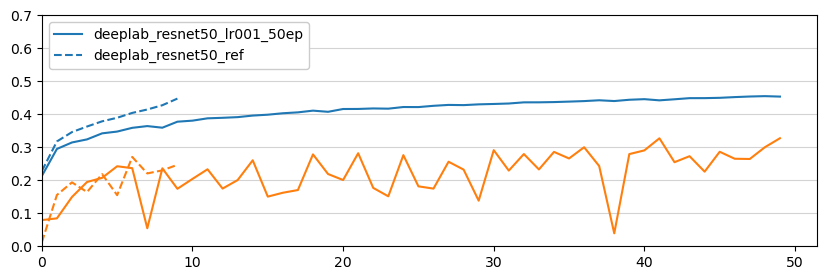

In [13]:
plot_vs_ref('deeplab_resnet50_lr001_50ep', 'deeplab_resnet50_ref')

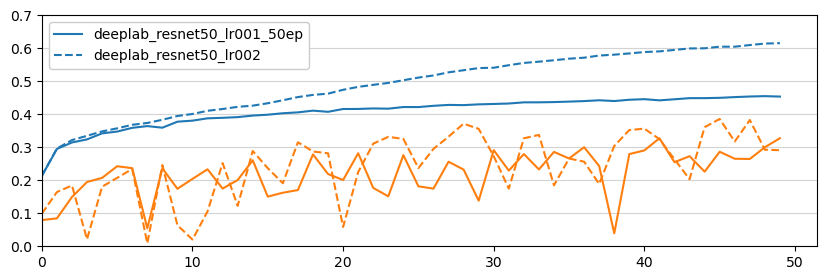

In [14]:
plot_vs_ref('deeplab_resnet50_lr001_50ep', 'deeplab_resnet50_lr002')

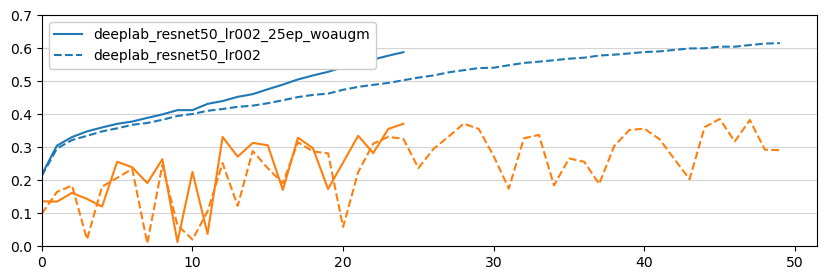

In [15]:
plot_vs_ref('deeplab_resnet50_lr002_25ep_woaugm', 'deeplab_resnet50_lr002')

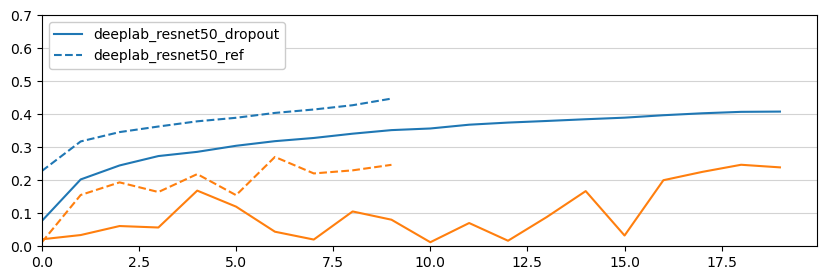

In [16]:
plot_vs_ref('deeplab_resnet50_dropout', 'deeplab_resnet50_ref')

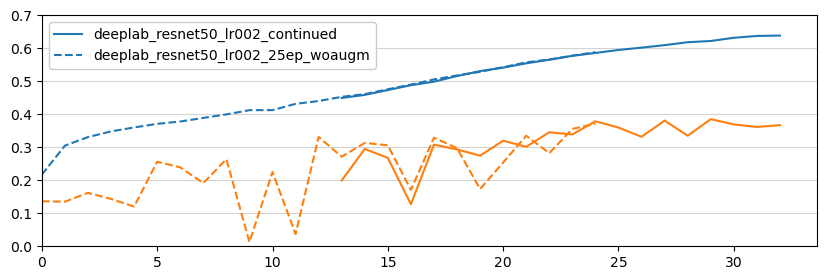

In [17]:
plot_vs_ref('deeplab_resnet50_lr002_continued', 'deeplab_resnet50_lr002_25ep_woaugm')

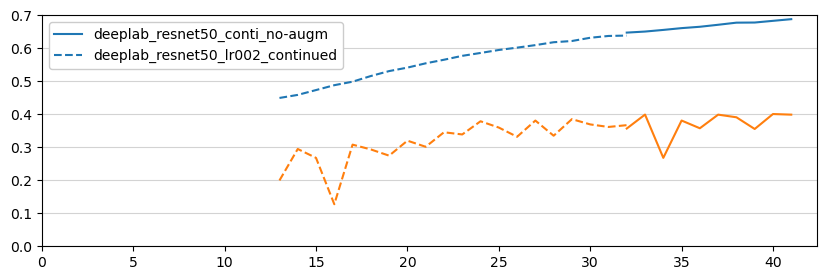

In [18]:
plot_vs_ref('deeplab_resnet50_conti_no-augm', 'deeplab_resnet50_lr002_continued')

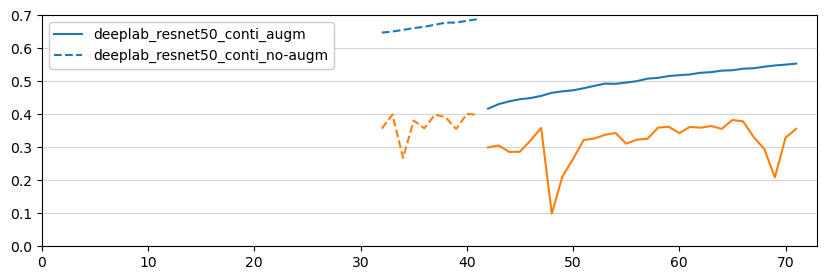

In [19]:
plot_vs_ref('deeplab_resnet50_conti_augm', 'deeplab_resnet50_conti_no-augm')

## DeepLabV3+/P3DResNet

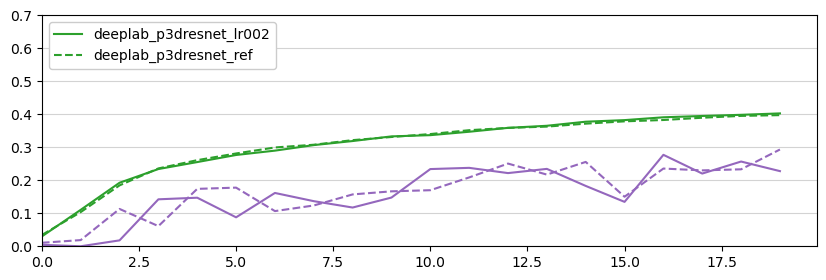

In [20]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_p3dresnet_ref')

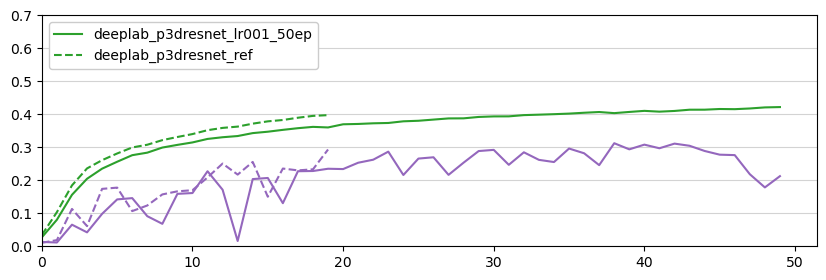

In [21]:
plot_vs_ref('deeplab_p3dresnet_lr001_50ep', 'deeplab_p3dresnet_ref')

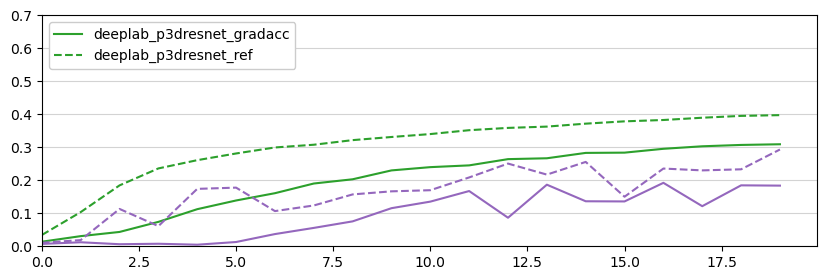

In [22]:
plot_vs_ref('deeplab_p3dresnet_gradacc', 'deeplab_p3dresnet_ref')

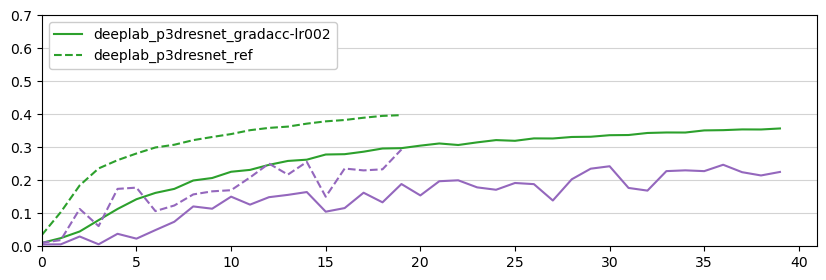

In [23]:
plot_vs_ref('deeplab_p3dresnet_gradacc-lr002', 'deeplab_p3dresnet_ref')

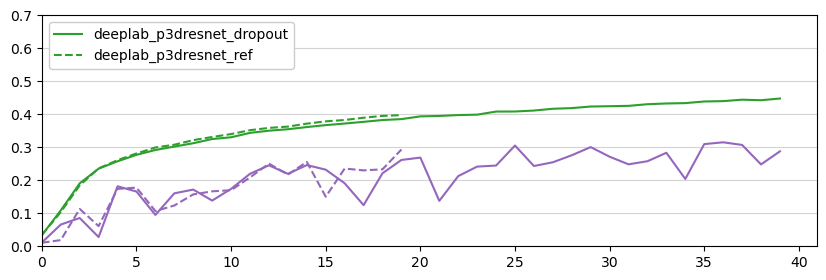

In [24]:
plot_vs_ref('deeplab_p3dresnet_dropout', 'deeplab_p3dresnet_ref')

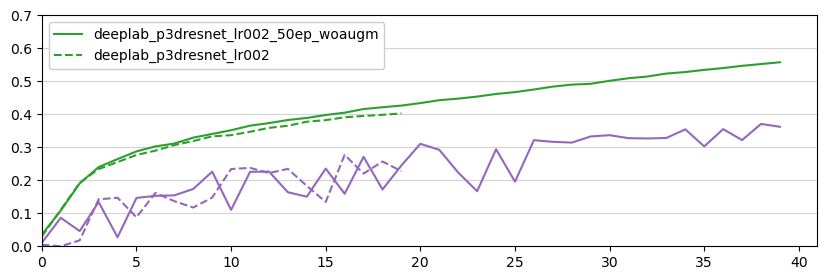

In [25]:
plot_vs_ref('deeplab_p3dresnet_lr002_50ep_woaugm', 'deeplab_p3dresnet_lr002')

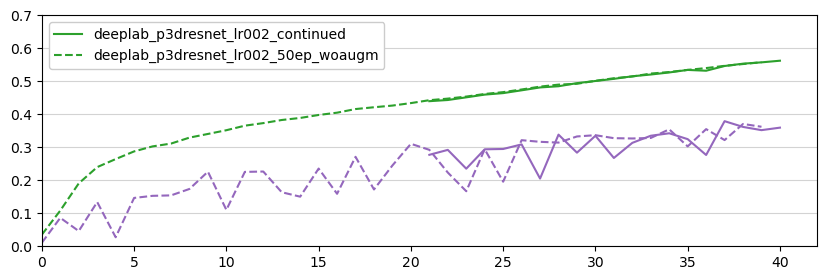

In [26]:
plot_vs_ref('deeplab_p3dresnet_lr002_continued', 'deeplab_p3dresnet_lr002_50ep_woaugm')

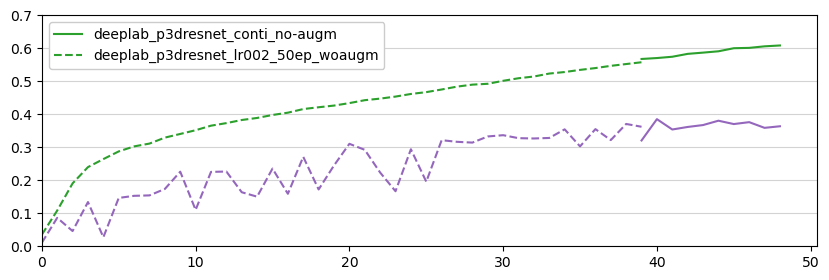

In [27]:
plot_vs_ref('deeplab_p3dresnet_conti_no-augm', 'deeplab_p3dresnet_lr002_50ep_woaugm')

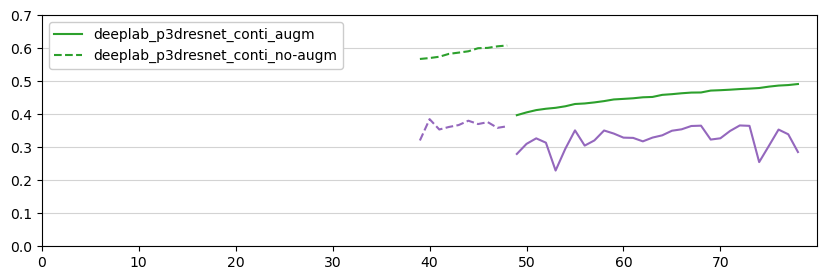

In [28]:
plot_vs_ref('deeplab_p3dresnet_conti_augm', 'deeplab_p3dresnet_conti_no-augm')

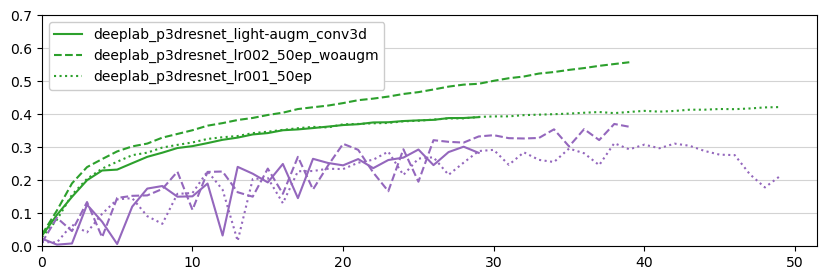

In [29]:
plot_vs_ref('deeplab_p3dresnet_light-augm_conv3d', 'deeplab_p3dresnet_lr002_50ep_woaugm',
           'deeplab_p3dresnet_lr001_50ep')

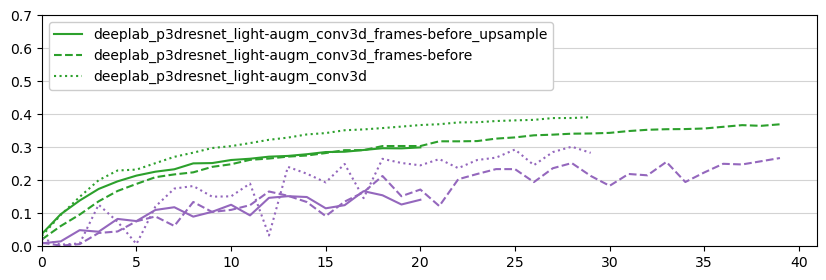

In [30]:
plot_vs_ref(
    'deeplab_p3dresnet_light-augm_conv3d_frames-before_upsample',
    'deeplab_p3dresnet_light-augm_conv3d_frames-before',
    'deeplab_p3dresnet_light-augm_conv3d')

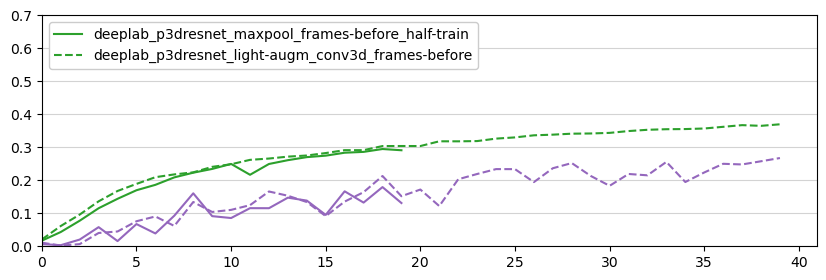

In [31]:
plot_vs_ref(
    'deeplab_p3dresnet_maxpool_frames-before_half-train',
    'deeplab_p3dresnet_light-augm_conv3d_frames-before',
)

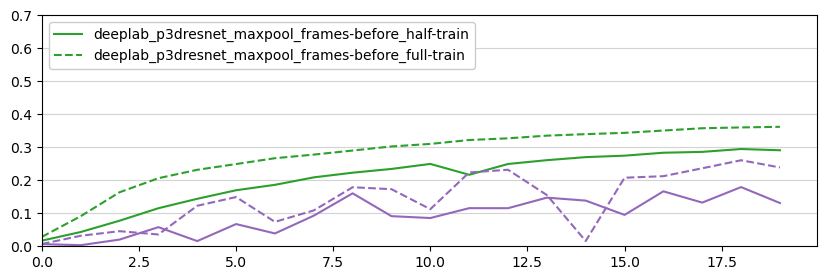

In [32]:
plot_vs_ref(
    'deeplab_p3dresnet_maxpool_frames-before_half-train',
    'deeplab_p3dresnet_maxpool_frames-before_full-train',
)

## DeepLabV3+/P3DResNet vs ResNet50

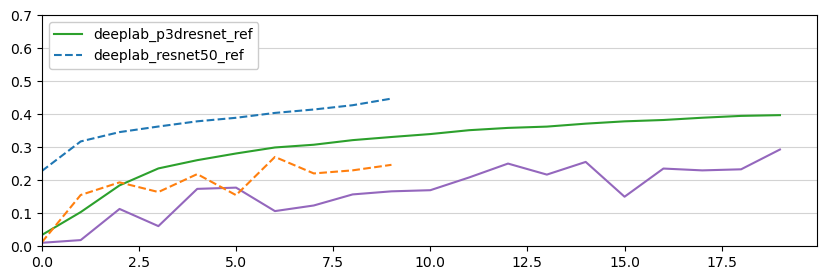

In [33]:
plot_vs_ref('deeplab_p3dresnet_ref', 'deeplab_resnet50_ref')

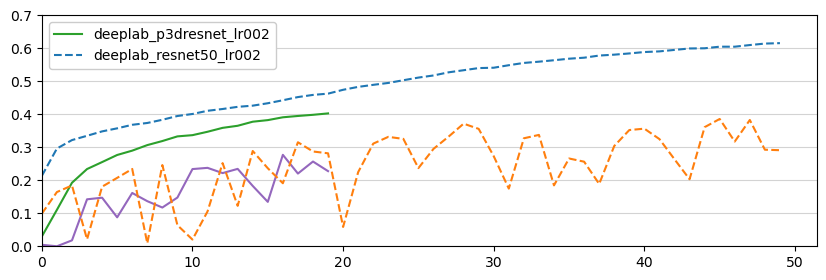

In [34]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_resnet50_lr002')

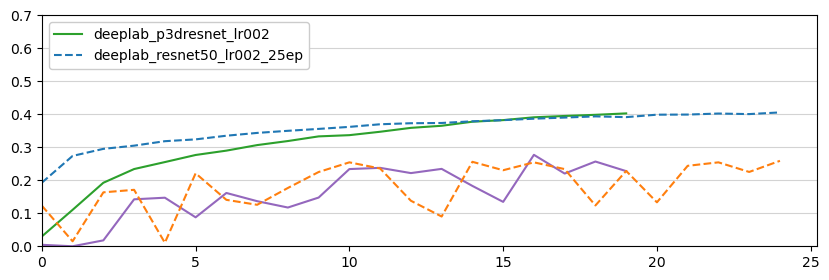

In [35]:
plot_vs_ref('deeplab_p3dresnet_lr002', 'deeplab_resnet50_lr002_25ep')

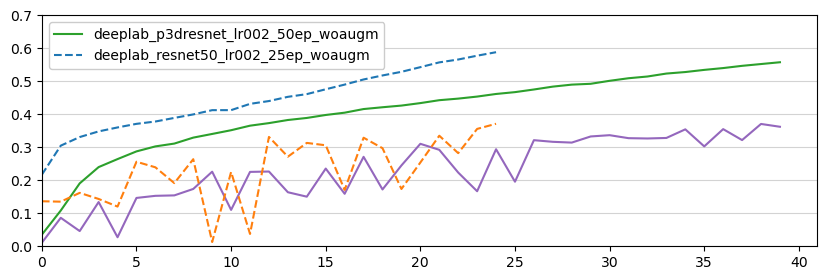

In [36]:
plot_vs_ref('deeplab_p3dresnet_lr002_50ep_woaugm', 'deeplab_resnet50_lr002_25ep_woaugm')

## DeepLabV3+ vs U-Net

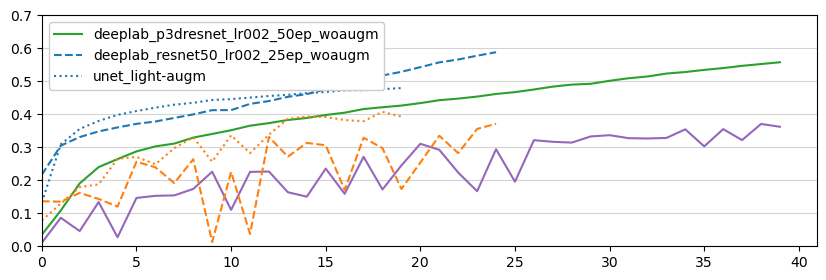

In [37]:
plot_vs_ref(
    'deeplab_p3dresnet_lr002_50ep_woaugm',
    'deeplab_resnet50_lr002_25ep_woaugm',
    'unet_light-augm',
)

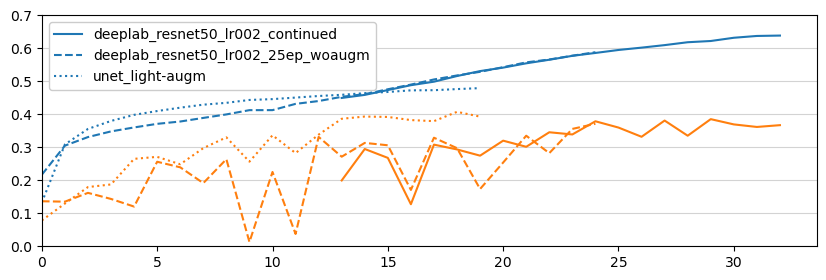

In [38]:
plot_vs_ref(
    'deeplab_resnet50_lr002_continued',
    'deeplab_resnet50_lr002_25ep_woaugm',
    'unet_light-augm',
)

## Final submissions

- **30 h / 4 runs = 7.5 h per run**
- ??? 4-frames-before or 5-frames-centered ???
- ??? (+/-)-SpatialDropout ???
- lr-exp
  - 0.002 to 0.001 in 20 epochs --> 0.85 every 5 epochs
  - 0.002 to 0.001 in 50 epochs --> 0.93 every 5 epochs
---

- **UNet**
  - **7 h -** 30 epochs: lr=0.001-exp-0.9/10 light-augm [v44] in 06:38:50
- DeepLab ResNet50
  - **4 h -** 50 epochs: lr=0.002-exp-0.9/5 light-augm [v48] in 04:38:05
  - **4 h -** 50 epochs: lr=0.002-exp-0.9/5 no-augm [v47] in 04:41:13
- DeepLab P3DResnet
  - **7.5 h -** 40 epochs: lr=0.002-exp-0.9/5 light-augm [v45] in 07:42:44
  - **7.5 h -** 32 epochs: lr=0.002-exp-0.9/5 no-augm [v49] in 06:24:13

---

| version | model | augm | epochs | train | valid | (threshold) valid | submission | final score |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| v44 | UNet/Basic | light | 30 | 0.5008 | 0.4321 | (0.3) 0.5529 | **0.613** | **0.633** |
| v47 | DeepLab/ResNet50 | no | 50 | 0.7321 | 0.4098 | (0.2) 0.4578 | 0.509 | 0.540 |
| v48 | DeepLab/ResNet50 | light | 50 | 0.5126 | 0.3221 | (0.2) 0.4592 | 0.458 | 0.510 |
| v49 | DeepLab/P3DResNet | no | 32 | 0.5214 | 0.3475 | (0.2) 0.4546 | 0.499 |  0.518 |
| v45 | DeepLab/P3DResNet | light | 40 | 0.4329  | 0.3028 | (0.2) 0.4633 | **0.546** | **0.557** |


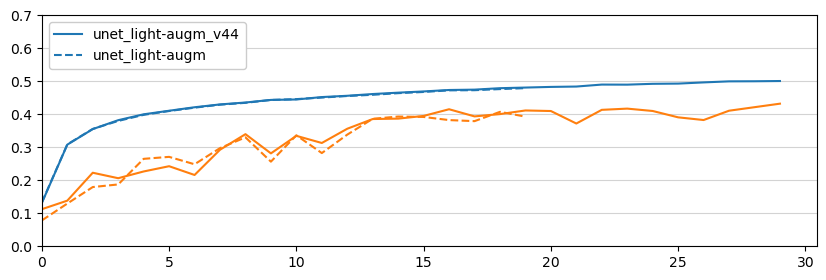

In [39]:
plot_vs_ref('unet_light-augm_v44', 'unet_light-augm')

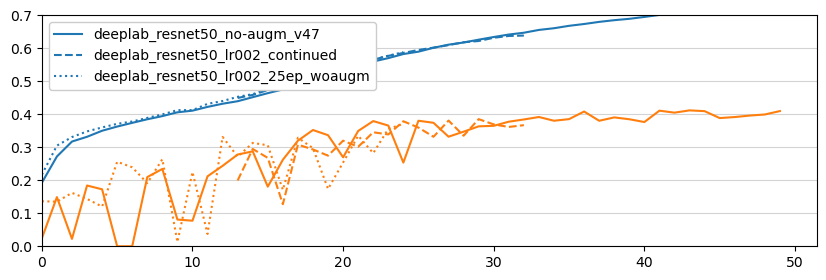

In [40]:
plot_vs_ref('deeplab_resnet50_no-augm_v47', 'deeplab_resnet50_lr002_continued', 'deeplab_resnet50_lr002_25ep_woaugm')

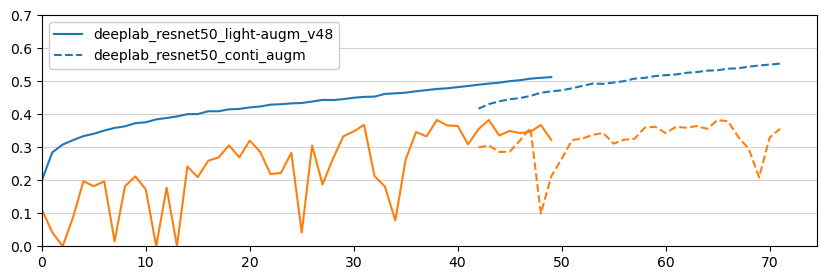

In [41]:
plot_vs_ref('deeplab_resnet50_light-augm_v48', 'deeplab_resnet50_conti_augm')

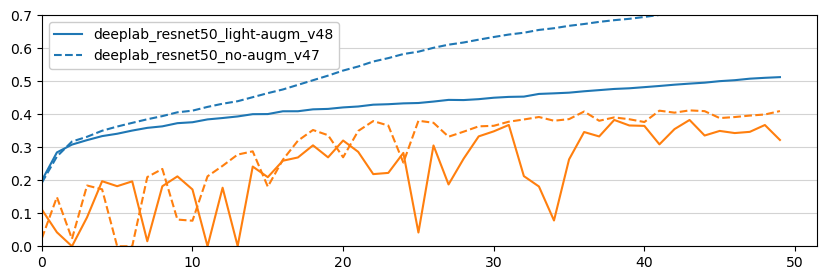

In [42]:
plot_vs_ref('deeplab_resnet50_light-augm_v48', 'deeplab_resnet50_no-augm_v47')

---

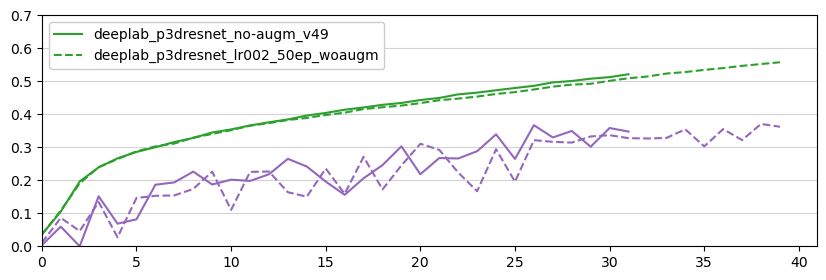

In [43]:
plot_vs_ref('deeplab_p3dresnet_no-augm_v49', 'deeplab_p3dresnet_lr002_50ep_woaugm')

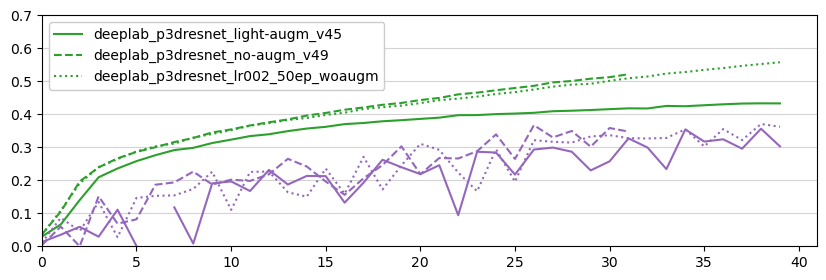

In [44]:
plot_vs_ref('deeplab_p3dresnet_light-augm_v45', 'deeplab_p3dresnet_no-augm_v49', 'deeplab_p3dresnet_lr002_50ep_woaugm')

## Training times

- `deeplab_resnet50`: 50 epochs in 4 h i.e. < **5 h** i.e. 75 epochs in 6 h
- `deeplab_p3dresnet`: 50 epochs in 9 h i.e. < **10 h** i.e. 40 epochs in < 7.5 h
- `unet_basic`: 20 epochs in 4.5 h i.e. < **5 h** (on Kaggle) i.e. 30 epochs < 7 h